In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [16]:
df = pd.read_csv("customer_shopping_data.csv")

In [17]:
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [18]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [19]:
df.tail()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park
99456,I232867,C273973,Female,36,Souvenir,3,35.19,Credit Card,15/10/2022,Mall of Istanbul


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [23]:
df.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [24]:
df.shape

(99457, 10)

In [25]:
df.columns

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')

In [35]:
missing_values = df.isna().sum().sort_values(ascending = False)
duplicates = df.duplicated().sum()

missing_values, duplicates

(invoice_no        0
 customer_id       0
 gender            0
 age               0
 category          0
 quantity          0
 price             0
 payment_method    0
 invoice_date      0
 shopping_mall     0
 dtype: int64,
 0)

In [36]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'], errors='coerce')

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'quantity'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >]], dtype=object)

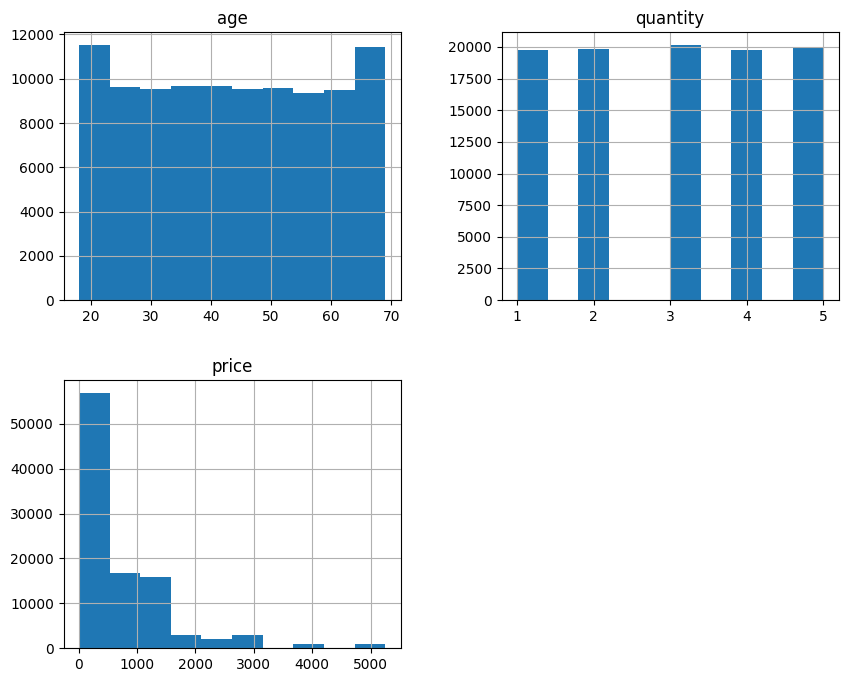

In [32]:
df.hist(figsize=(10, 8))

In [37]:
avg_quantity = df['quantity'].mean()
avg_price = df['price'].mean()
max_price = df['price'].max()
min_price = df['price'].min()

avg_quantity, avg_price, max_price, min_price   

(3.003428617392441, 689.2563209226097, 5250.0, 5.23)

In [41]:
total_revenue = df['price'].sum()
total_revenue

68551365.91

In [43]:
popular_categories = df['category'].value_counts()
popular_categories

category
Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: count, dtype: int64

In [45]:
average_revenue_per_transaction = df['price'].mean()
average_revenue_per_transaction

689.2563209226097

In [46]:
mall_revenue = df.groupby('shopping_mall')['price'].sum().sort_values(ascending=False)
mall_revenue

shopping_mall
Mall of Istanbul     13851737.62
Kanyon               13710755.24
Metrocity            10249980.07
Metropol AVM          6937992.99
Istinye Park          6717077.54
Zorlu Center          3509649.02
Cevahir AVM           3433671.84
Viaport Outlet        3414019.46
Emaar Square Mall     3390408.31
Forum Istanbul        3336073.82
Name: price, dtype: float64

In [49]:
age_bins = [0, 18, 25, 35, 50, 65, 100]
age_labels = ['<18', '18-25', '26-35', '36-50', '51-65', '65+']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)
age_group_distribution = df['age_group'].value_counts()

business_metrics = {
    "Total Revenue": total_revenue,
    "Most Popular Categories": popular_categories.head(3).to_dict(),
    "Average Revenue per Transaction": average_revenue_per_transaction,
    "Top 3 Malls by Revenue": mall_revenue.head(3).to_dict(),
    "Age Group Distribution": age_group_distribution.to_dict(),
}

business_metrics

{'Total Revenue': 68551365.91,
 'Most Popular Categories': {'Clothing': 34487,
  'Cosmetics': 15097,
  'Food & Beverage': 14776},
 'Average Revenue per Transaction': 689.2563209226097,
 'Top 3 Malls by Revenue': {'Mall of Istanbul': 13851737.62,
  'Kanyon': 13710755.24,
  'Metrocity': 10249980.07},
 'Age Group Distribution': {'36-50': 28906,
  '51-65': 28547,
  '26-35': 19081,
  '18-25': 13496,
  '65+': 9427,
  '<18': 0}}

(year_month
 2023-08    252117.95
 2023-09    194996.06
 2023-10    207778.80
 2023-11    142045.14
 2023-12    153712.67
 Freq: M, Name: price, dtype: float64,
 None)

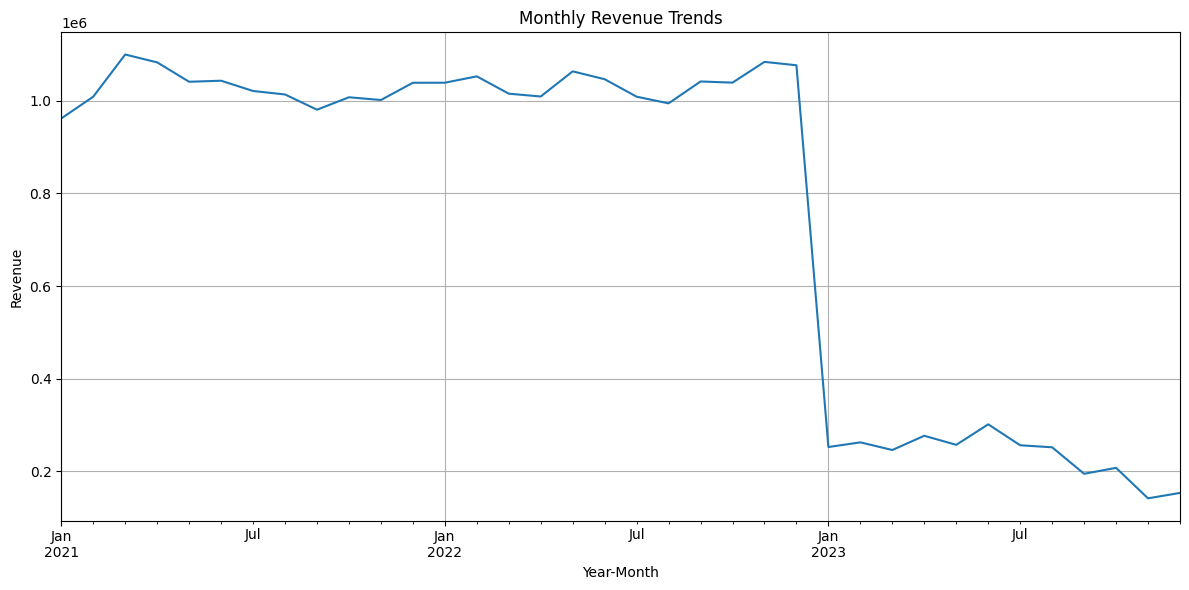

In [50]:
# Adding year and month for trend analysis
df['year_month'] = df['invoice_date'].dt.to_period('M')
revenue_trends = df.groupby('year_month')['price'].sum()

revenue_trends_plot = revenue_trends.plot(
    title="Monthly Revenue Trends",
    xlabel="Year-Month",
    ylabel="Revenue",
    figsize=(12, 6),
    grid=True
)

revenue_trends.tail(), revenue_trends_plot.figure.tight_layout()

In [51]:
quantity_stats = df['quantity'].describe()
price_stats = df['price'].describe()


def find_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return {
        "lower_bound": lower_bound,
        "upper_bound": upper_bound,
        "outliers_count": len(outliers),
        "outliers": outliers
    }

quantity_outliers = find_outliers(df['quantity'])
price_outliers = find_outliers(df['price'])


anomaly_summary = {
    "Quantity Stats": quantity_stats.to_dict(),
    "Price Stats": price_stats.to_dict(),
    "Quantity Outliers": quantity_outliers,
    "Price Outliers": price_outliers
}

anomaly_summary

{'Quantity Stats': {'count': 99457.0,
  'mean': 3.003428617392441,
  'std': 1.4130251343054252,
  'min': 1.0,
  '25%': 2.0,
  '50%': 3.0,
  '75%': 4.0,
  'max': 5.0},
 'Price Stats': {'count': 99457.0,
  'mean': 689.2563209226097,
  'std': 941.184567215467,
  'min': 5.23,
  '25%': 45.45,
  '50%': 203.3,
  '75%': 1200.32,
  'max': 5250.0},
 'Quantity Outliers': {'lower_bound': -1.0,
  'upper_bound': 7.0,
  'outliers_count': 0,
  'outliers': Series([], Name: quantity, dtype: int64)},
 'Price Outliers': {'lower_bound': -1686.8549999999998,
  'upper_bound': 2932.625,
  'outliers_count': 5024,
  'outliers': 3        3000.85
  15       3000.85
  23       5250.00
  53       4200.00
  69       5250.00
            ...   
  99332    3000.85
  99374    3150.00
  99387    3150.00
  99424    3150.00
  99455    4200.00
  Name: price, Length: 5024, dtype: float64}}

In [53]:
categorical_summary = {col: df[col].nunique() for col in df.select_dtypes(include='object').columns}
categorical_summary

{'invoice_no': 99457,
 'customer_id': 99457,
 'gender': 2,
 'category': 8,
 'payment_method': 3,
 'shopping_mall': 10}

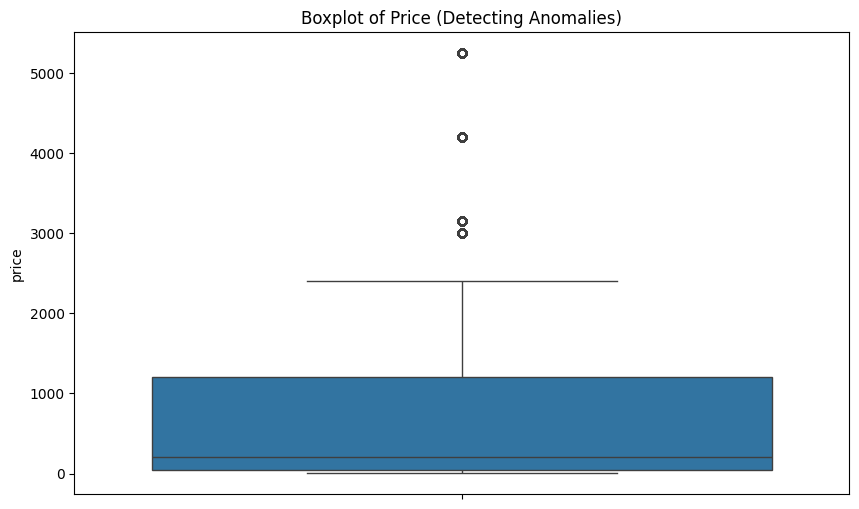

In [55]:
# Detect anomalies in 'price' using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(df['price'])
plt.title('Boxplot of Price (Detecting Anomalies)')
plt.show()


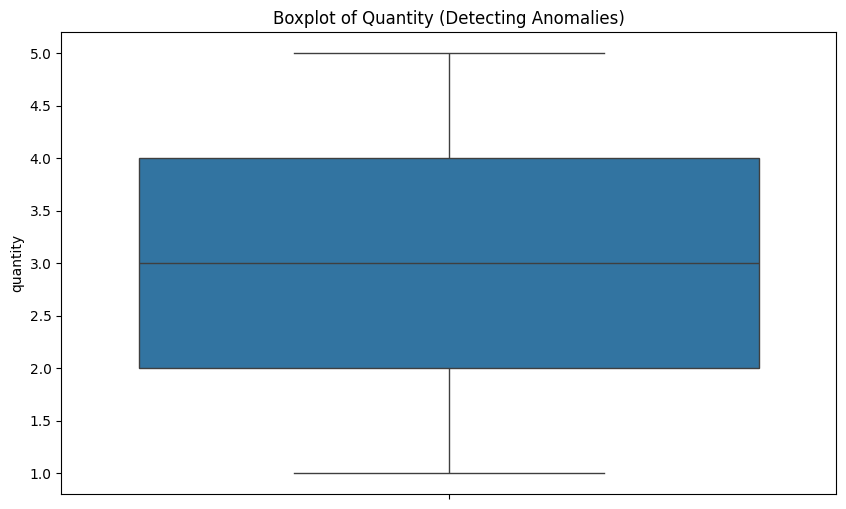

In [58]:
# Detect anomalies in 'quantity' using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(df['quantity'])
plt.title('Boxplot of Quantity (Detecting Anomalies)')
plt.show()


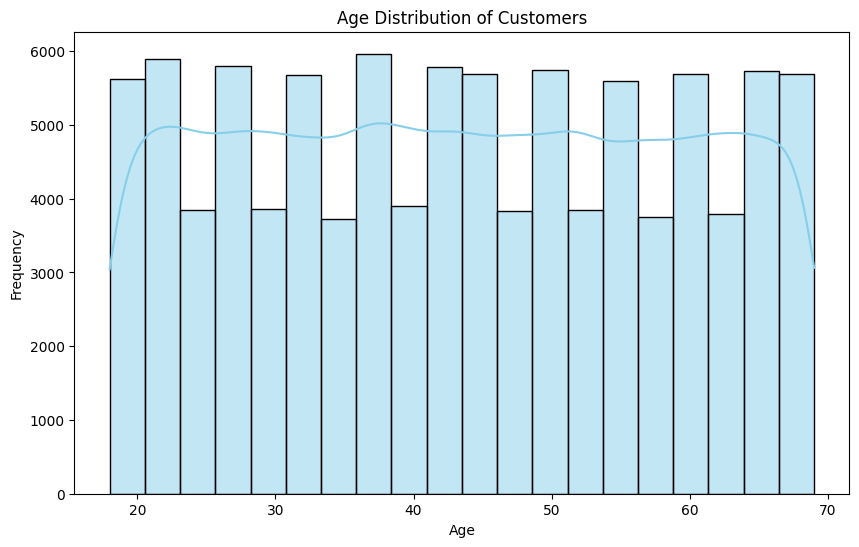

In [60]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()